<a href="https://colab.research.google.com/github/muditagarg99/CarDekho/blob/main/Car_Dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import create_report
import seaborn as sns
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Files

In [ ]:
folder_path='/content/drive/MyDrive/Colab Notebooks/Assignment/Machine Learning/LinearR/self_project_cardekho/'

In [ ]:
df1=pd.read_csv(folder_path+'Car details v3.csv')
df2= pd.read_csv(folder_path+'car data.csv')
df3= pd.read_csv(folder_path+'CAR DETAILS FROM CAR DEKHO.csv')


# EDA of all the three files

In [ ]:
# r1= create_report(df1)
#r2= create_report(df2)
#r3= create_report(df3)

In [ ]:
#r1

In [ ]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df2.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df1.shape

(8128, 13)

In [ ]:
df2.shape

(301, 9)

In [ ]:
df3.shape

(4340, 8)

after going through df1, df2 and df3


> It is observed that df2 are the cars which are registered on CARDEKHO. df3 is also a subset of df1. 
df1 is the data set for all the cars and df1 has all the columns which are in df2 and df3. So for the prediction of the car we will use bigger dataset to get the better approximation. It would also work well with the cars registered in CARDEKHO



# Preparing the dataset: df1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df1.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
df1=df1.drop_duplicates()
df1.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


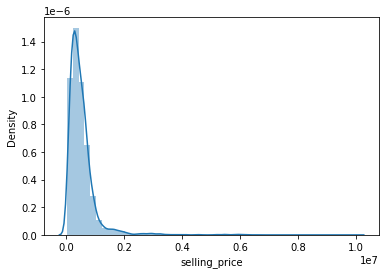

In [ ]:
sns.distplot(df1.selling_price)

As the selling price is right skewed, the log would be applied on it

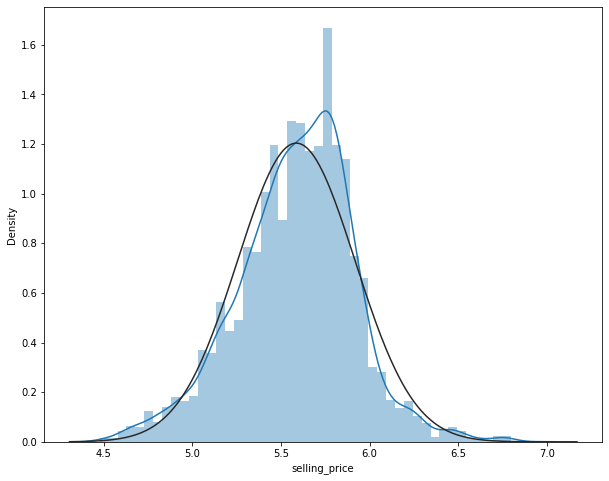

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.distplot(np.log10(df1.selling_price), fit= norm)

The selling price gives the normal curve over the data.  now we can apply LR over this.
But before that we need to focus on other data columns as well
 

1.   There are some null values wich needs to be filled with the min value or average value
2.   Convert some columns which are of str type, due to their units, needs to be changes to float / int type(numeric type)



## focus on categorial columns

In [ ]:
df1.describe(include='O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6926,6926,6926,6926,6926,6718,6718,6721,6717
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,118,3755,6218,6342,4242,210,907,324,472


Lets fill the seats missing value with '5' considering it a normal 5 seater car (most frequent value)

In [ ]:
df1.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

Droping the column 'torque' as it canot be converte to float type

In [ ]:
df1.drop(['torque'],axis=1,inplace=True)

Now, three columns: mileage, engine and max_power needs to be converted to numeric type

In [ ]:



df1['mileage_con']=df1['mileage'].str.split(' ',expand=True)[0]
df1['engine_con']=df1['engine'].str.split(' ',expand=True)[0]
df1['power_con']=df1['max_power'].str.split(' ',expand=True)[0]
df1['power_con'].replace('',100,inplace=True) 

df1['mileage_con']=df1['mileage_con'].astype(float)
df1['engine_con']=df1['engine_con'].astype(float)
df1['power_con']=df1['power_con'].astype(float)

df1['mileage_con']=df1['mileage_con'].replace(np.nan,df1['mileage_con'].mean())      # replacing with the close to avg value
df1['engine_con']=df1['engine_con'].replace(np.nan,df1['engine_con'].median())        # replacing with the low value
df1['power_con']=df1['power_con'].replace(np.nan,df1['power_con'].median()) 
                                          # replacing with the avg value
df1['seats']=df1['seats'].replace(np.nan,5)






There is multicollinearity between 'seats' and 'engine'
before eiliminating we need to judge through VIF factor

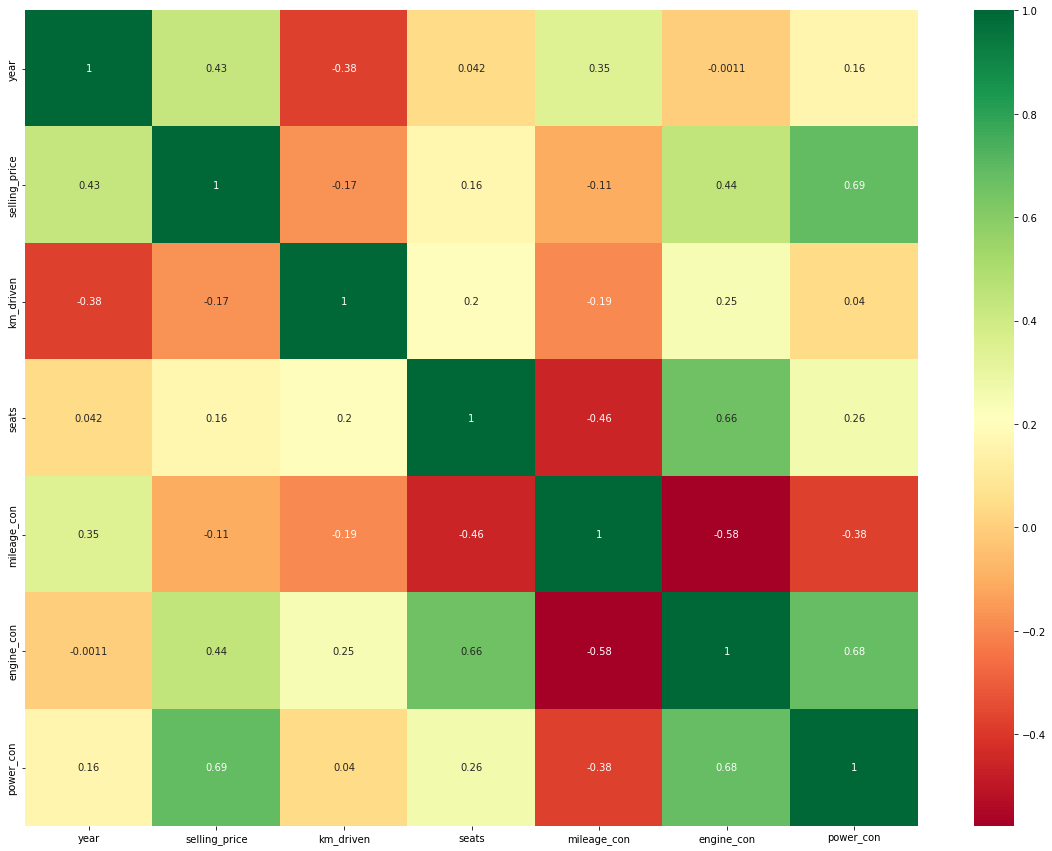

In [ ]:
fig=plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True,cmap="RdYlGn")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif=pd.DataFrame()
  vif['Fetures']=X.columns
  vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return (vif)

In [ ]:
cal_vif(df1[[i for i in df1.describe().columns if i not in ['selling_price','seats','year']]])

,Fetures,VIF
0,km_driven,2.822367
1,mileage_con,5.540031
2,engine_con,17.874583
3,power_con,16.836990


Now, VIF is below 10
The categorical data to be converted to dummies. We also ned to drop the seats column.

In [ ]:
df1.drop(['seats'], axis=1, inplace=True)
#df1['year']= df1['year'].apply(lambda x: 1 if x<2005 else(2 if 2005<x<2010 else(3 if 2010<x<2015 else 4)) )
#df1['transmission']=df1['transmission'].apply(lambda x: 2 if x=='Automatic' else 1)
df1=pd.get_dummies(df1,columns=['year','fuel','seller_type','owner','transmission'])

In [ ]:
df1['company']=df1['name'].str.split(' ',expand=True)[0]
df1.company.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
df_com=pd.DataFrame(df1.groupby(['company']).agg({'selling_price':'mean'}))
df_com.rename(columns={'selling_price':'mean_price'},inplace=True)

print('miniumm price of the car', df_com.min(), 'maximum price of the car is',df_com.max())

miniumm price of the car mean_price    57000.0
dtype: float64 maximum price of the car is mean_price    5150000.0
dtype: float64


In [ ]:
df1=df1.merge(df_com, on='company',how='left')
df1['comapany_cat']=df1['mean_price'].apply(lambda x: 0 if x<12000 else(1 if 12000<=x<24000 else 2))

Its the time to eliminate the name, company, mean_price columns and the rest data is ready for the application of linear reg

In [ ]:
df1.drop(['name','company','mean_price','mileage','engine','max_power'], axis=1, inplace=True)

# Model application

In [ ]:
err=pd.DataFrame(columns=['model','param','score','RMSE_train','RMSE_test','R2Score_test','R2Adj'])

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y=np.log10(df1['selling_price']).values
X=df1[[i for i in df1.describe().columns if i not in ['selling_price']]].values
print(X.shape,y.shape)

ee = IsolationForest(contamination=0.2)
yhat = ee.fit_predict(X)
mask = yhat != -1
X, y = X[mask, :], y[mask]
print(X.shape,y.shape)

(6926, 48) (6926,)
(5541, 48) (5541,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

## Linear Regression model

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
LR=LinearRegression().fit(X_train,y_train)

In [ ]:
scr=LR.score(X_train,y_train)

In [ ]:
y_test_pred =LR.predict(X_test)
y_train_pred =LR.predict(X_train)

In [ ]:
RM_train= np.sqrt(mean_squared_error(10**y_train,10**y_train_pred))
RM_test= np.sqrt(mean_squared_error(10**y_test,10**y_test_pred))

In [ ]:
RM_train

128446.2437176516

In [ ]:
R2= r2_score(10**(y_train),10**(y_train_pred))
RA2=  1-((1-(R2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )

In [ ]:
err.loc[len(err.index)]= ['Linear', 'NA', scr, RM_train, RM_test, R2,RA2]

## Ridge Regression

In [ ]:
rid=Ridge()
param={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100]}
rid_regressor=GridSearchCV(rid,param,scoring='neg_mean_squared_error',cv=5)
rid_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
pr1= rid_regressor.best_params_
scr=rid_regressor.score(X_train,y_train)

In [ ]:
y_test_pred =rid_regressor.predict(X_test)
y_train_pred =rid_regressor.predict(X_train)

In [ ]:
RM_train= np.sqrt(mean_squared_error(10**y_train,10**y_train_pred))
RM_test= np.sqrt(mean_squared_error(10**y_test,10**y_test_pred))

In [ ]:
R2= r2_score(10**y_test,10**y_test_pred)
RA2=  1-((1-(R2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )

In [ ]:
err.loc[len(err.index)]= ['Ridge', pr1, scr, RM_train, RM_test, R2,RA2]

In [ ]:
err

,model,param,score,RMSE_train,RMSE_test,R2Score_test,R2Adj
0,Linear,NA,0.820700,128446.243718,126723.266645,0.804454,0.643282
1,Ridge,{'alpha': 1e-13},-0.016011,128471.044676,126753.857193,0.790547,0.620857


## Lasso Regression

In [ ]:
las=Lasso()
param={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100]}
las_regressor=GridSearchCV(las,param,scoring='neg_mean_squared_error',cv=5)
las_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
pr1= las_regressor.best_params_
scr=las_regressor.score(X_train,y_train)

In [ ]:
y_test_pred =las_regressor.predict(X_test)
y_train_pred =las_regressor.predict(X_train)

In [ ]:
RM_train= np.sqrt(mean_squared_error(10**y_train,10**y_train_pred))
RM_test= np.sqrt(mean_squared_error(10**y_test,10**y_test_pred))

In [ ]:
R2= r2_score(10**y_test,10**y_test_pred)
RA2=  1-((1-(R2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )

In [ ]:
err.loc[len(err.index)]= ['Lasso', pr1, scr, RM_train, RM_test, R2,RA2]

In [ ]:
err

,model,param,score,RMSE_train,RMSE_test,R2Score_test,R2Adj
0,Linear,NA,0.820700,128446.243718,126723.266645,0.804454,0.643282
1,Ridge,{'alpha': 1e-13},-0.016011,128471.044676,126753.857193,0.790547,0.620857
2,Lasso,{'alpha': 0.0001},-0.016012,128516.632345,126793.269016,0.790416,0.620648


## Elastic Net 

In [ ]:
elastic= ElasticNet()
para={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
            
elastic_reg =GridSearchCV(elastic,para,scoring='neg_mean_squared_error', cv=5)
elastic_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
pr1= elastic_reg.best_params_
scr=elastic_reg.score(X_train,y_train)

In [ ]:
y_test_pred =elastic_reg.predict(X_test)
y_train_pred = elastic_reg.predict(X_train)

In [ ]:
RM_train= np.sqrt(mean_squared_error(10**y_train,10**y_train_pred))
RM_test= np.sqrt(mean_squared_error(10**y_test,10**y_test_pred))

In [ ]:
R2= r2_score(10**y_test,10**y_test_pred)
RA2=  1-((1-(R2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )

In [ ]:
err.loc[len(err.index)]= ['ElasticNet', pr1, scr, RM_train, RM_test, R2,RA2]

In [ ]:
err

,model,param,score,RMSE_train,RMSE_test,R2Score_test,R2Adj
0,Linear,NA,0.820700,128446.243718,126723.266645,0.804454,0.643282
1,Ridge,{'alpha': 1e-13},-0.016011,128471.044676,126753.857193,0.790547,0.620857
2,Lasso,{'alpha': 0.0001},-0.016012,128516.632345,126793.269016,0.790416,0.620648
3,ElasticNet,"{'alpha': 0.001, 'l1_ratio': 0.4}",-0.016018,128683.403825,126927.363172,0.789973,0.619940
